In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys, os

In [4]:
og_q_path = os.path.join('..', 'data_files', 'quarterly_orig.csv')
og_qdf = pd.read_csv(og_q_path)

/var/folders/5w/9htyqd7s7fvcqcn47w7nfyqc0000gn/T/ipykernel_55281/2341645999.py:2: DtypeWarning: Columns (10,17,26,30,650,657,668,669,679) have mixed types. Specify dtype option on import or set low_memory=False.
  og_qdf = pd.read_csv(og_q_path)


/var/folders/5w/9htyqd7s7fvcqcn47w7nfyqc0000gn/T/ipykernel_55281/4267500095.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


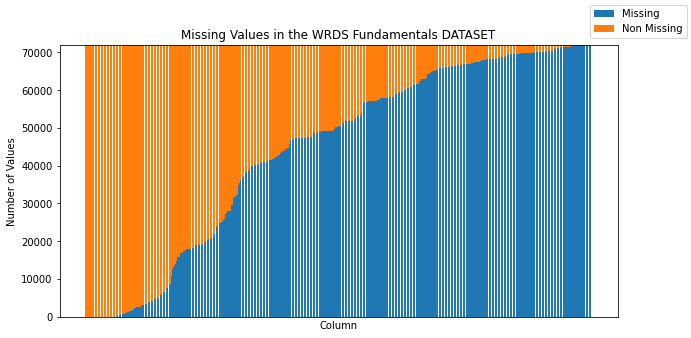

In [12]:
missing = og_qdf.apply(lambda col: pd.isna(col).sum()).sort_values()
non_missing = len(og_qdf) - missing
fig, ax = plt.subplots()
ax.bar(missing.index.values, missing.values, label='Missing')
ax.bar(non_missing.index.values, non_missing.values, bottom=missing, label='Non Missing')
ax.set_title('Missing Values in the WRDS Fundamentals DATASET')
ax.set_xlabel('Column')
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_ylabel('Number of Values')
fig.set_size_inches(10, 5)
fig.legend()

**We will require that a column has at least 90% of its data to proceed to the next step of cleaning**
- This is a reasonable requirement because most of the columns are highly correlated with some other column in the data set that is more frequently reported
- In the end, we want the fundamental metrics that are used by a broad range of comapanies. 

In [8]:
missing_ratio = missing / len(og_qdf)

gvkey          0
fic            0
rp             0
busdesc        0
sic            0
           ...  
dldte      71941
add4       71941
tsafcy     71941
add2       71941
add3       71941
Length: 680, dtype: int64